In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import io

In [ ]:
#If you want run in google colab, you can download dataset by this code:
! wget https://github.com/m-ebrahimzadeh/Farsi-Digit-Classification/raw/e3b36fde338cab84c3a605110add516af1710f28/Data_hoda_full.mat -P dataset

#load data from matlab format
dataset = io.loadmat('/content/dataset/Data_hoda_full.mat')

In [62]:
print( type(dataset), '\n',
       dataset.keys(), '\n',
       dataset['Data'].shape)

<class 'dict'> 
 dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels']) 
 (60000, 1)


In [63]:
#remove redundent axis
data = np.squeeze(dataset['Data'], axis=1)
lbl = np.squeeze(dataset['labels'])
print(data.shape, lbl.shape)


(60000,) (60000,)


In [64]:
print(data[90], lbl[90])


[[  0   0   0 ...   0   0 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 3


In [65]:
x_train = data[:55000]
y_train = lbl[:55000]

x_test = data[55000:]
y_test = lbl[55000:]


print(x_train.shape, '\n', x_test.shape)

(55000,) 
 (5000,)


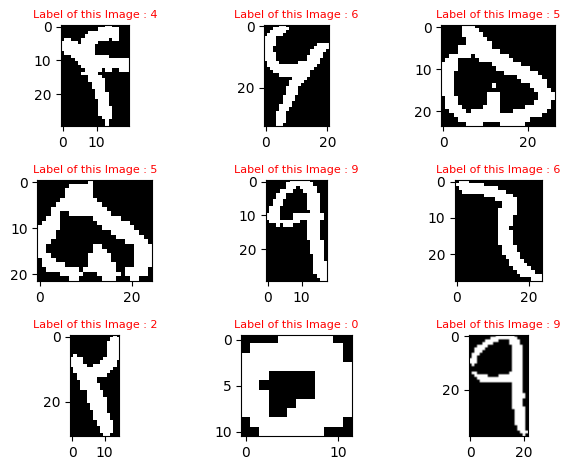

In [66]:
#Show some samples
for i in range (1, 10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.title('Label of this Image : '+str(y_train[sample_num+i]),pad=5,color='red',fontsize=8)
    plt.imshow(x_train[sample_num+i],cmap='gray')

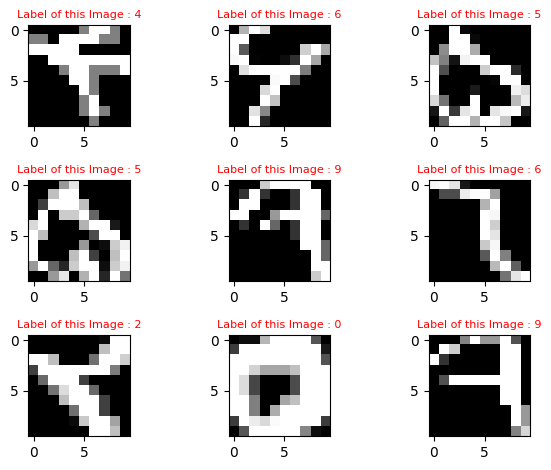

In [67]:
#resize selected data
new_dimention = 10
resized_x_train = [cv2.resize(img, (new_dimention, new_dimention)) for img in x_train]
resized_x_test = [cv2.resize(img, (new_dimention, new_dimention)) for img in x_test]

#show a changed sample
for i in range (1, 10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.title('Label of this Image : '+str(y_train[sample_num+i]),pad=5,color='red',fontsize=8)
    plt.imshow(resized_x_train[sample_num+i],cmap='gray')

In [68]:
#reshape data to a vector
X_train = np.reshape(resized_x_train, [-1, new_dimention**2])
X_test = np.reshape(resized_x_test, [-1, new_dimention**2])

print(X_train.shape, '\n', X_test.shape)

(55000, 100) 
 (5000, 100)


In [69]:
#build model
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=3, weights='distance')

In [70]:
#train
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [71]:
#evaluate
print(model.score(X_test, y_test) * 100, '%')

98.4 %
